In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Let's define a nice way of plotting the correlation matrix using seaborn

In [85]:
def plot_corr_sns(df, file_name):
    sns.set()
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(
            corr, 
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        fontsize=10
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        fontsize=10
    )
    plt.title(file_name)
    plt.savefig(r"../images/correlation_matrix_{}.pdf".format(file_name))
    plt.show()

Let's start by analysing correlations between the signals. We found some whitespaces in the column names (training set 2) and therefore we fixed them.

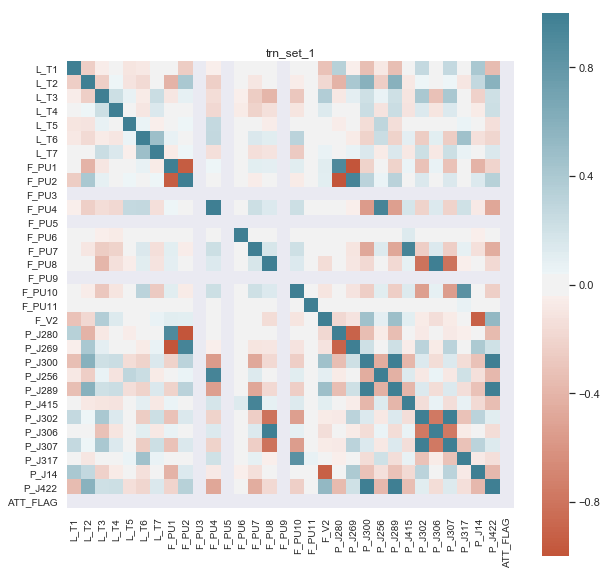

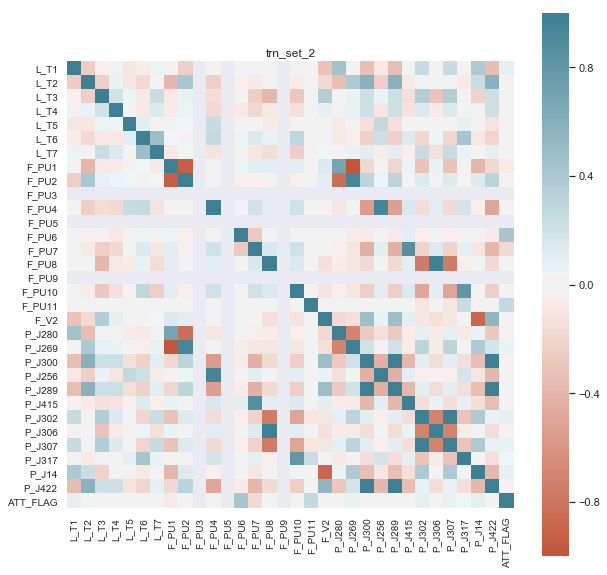

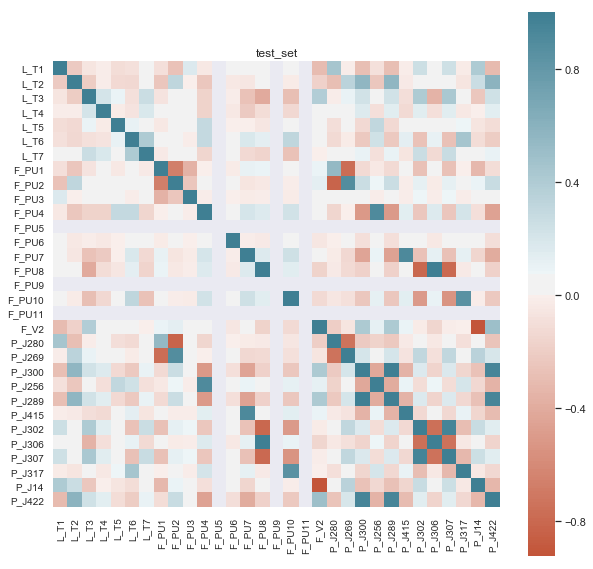

In [86]:
for file_name in ['trn_set_1', 'trn_set_2', 'test_set']:
    DATA_PATH = r"C:../data/{}.csv".format(file_name)
    data = pd.read_csv(DATA_PATH, header=0, parse_dates=['DATETIME'], index_col='DATETIME', dayfirst=True)

    
    discrete_variables = [f'S_PU{num+1}' for num in range(11)] + ['S_V2']
    
    data_no_discr = data.drop(columns=discrete_variables)
    plot_corr_sns(data_no_discr, file_name)

Some visualisations

In [87]:
file_name = 'trn_set_2'
DATA_PATH = r"C:../data/{}.csv".format(file_name)
data = pd.read_csv(DATA_PATH, header=0, parse_dates=['DATETIME'], index_col='DATETIME', dayfirst=True)

Visualization of attack for L_T7 in September 2016

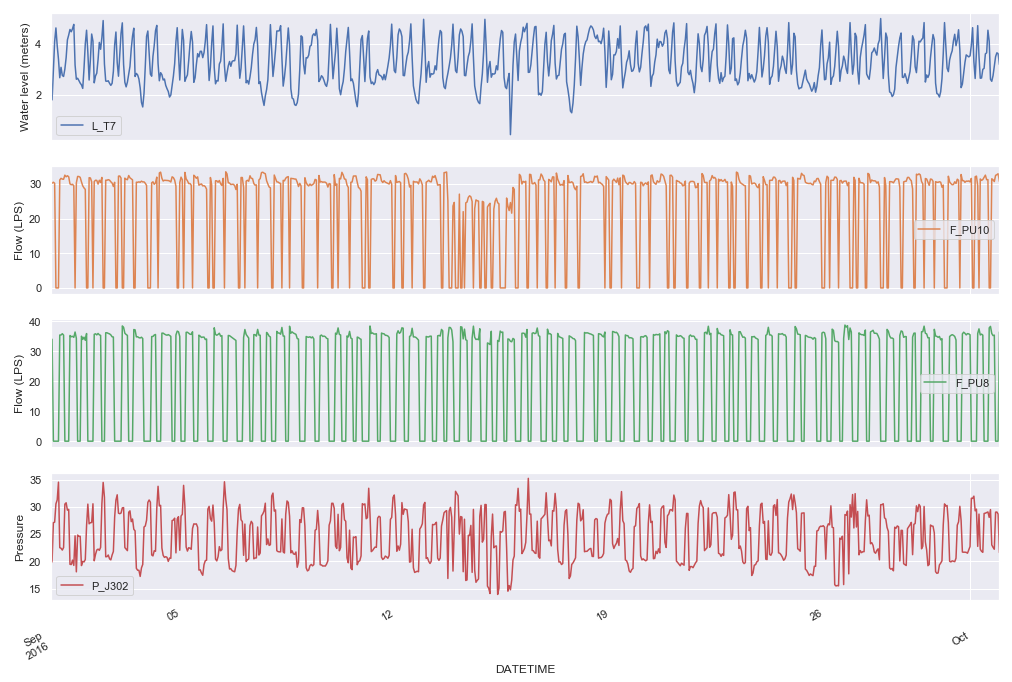

In [88]:
cols_plot = ['L_T7', 'F_PU10', 'F_PU8', 'P_J302']
axes = data.loc['2016-09-01':'2016-10-01'][cols_plot].plot(figsize=(17, 12), subplots=True)

for idx, ax in enumerate(axes):
    if idx == 0:
        ax.set_ylabel('Water level (meters)')
    if idx > 0 and idx < 3:
        ax.set_ylabel('Flow (LPS)')
    if idx == 3:
        ax.set_ylabel('Pressure')

plt.savefig(r"../images/attack_september_2016_LT7.pdf".format(file_name))
plt.show()

Let's visualize the attack of October 2016 on tower 1

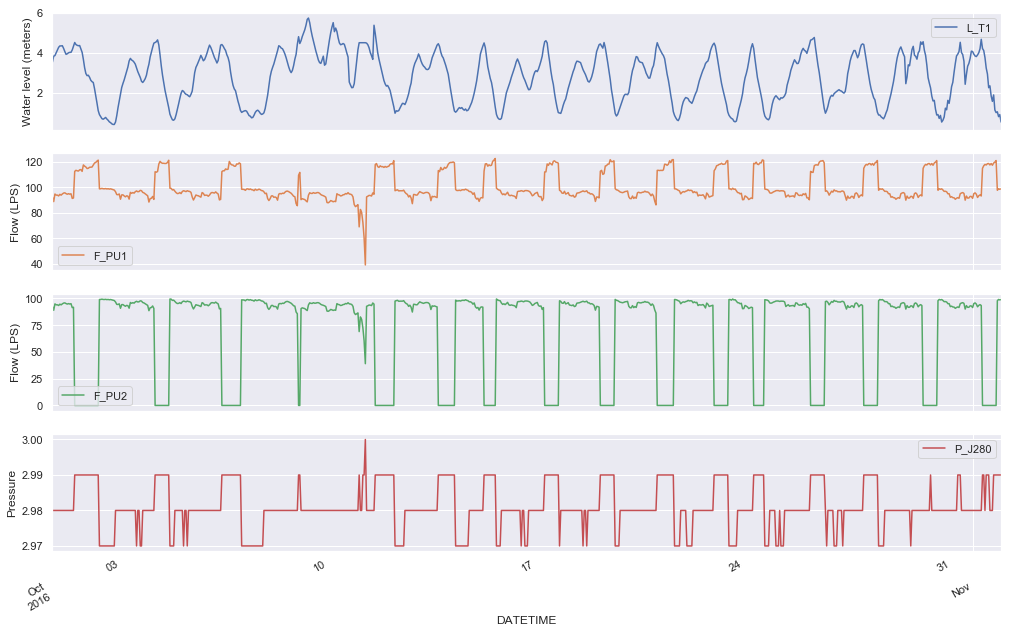

In [89]:
cols_plot = ['L_T1', 'F_PU1', 'F_PU2', 'P_J280']
axes = data.loc['2016-10-01':'2016-11-01'][cols_plot].plot(figsize=(17, 11), subplots=True)

for idx, ax in enumerate(axes):
    if idx == 0:
        ax.set_ylabel('Water level (meters)')
    if idx > 0 and idx < 3:
        ax.set_ylabel('Flow (LPS)')
    if idx == 3:
        ax.set_ylabel('Pressure')

plt.savefig(r"../images/attack_october_2016_LT1.pdf".format(file_name))
plt.show()
